# Start Wars Social Network Analysis

In [12]:
import os
import json

## Data Content

In [17]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/starwars-episode-1-interactions-allCharacters.json
data/starwars-episode-1-interactions.json
data/starwars-episode-1-mentions.json
data/starwars-episode-2-interactions-allCharacters.json
data/starwars-episode-2-interactions.json
data/starwars-episode-2-mentions.json
data/starwars-episode-3-interactions-allCharacters.json
data/starwars-episode-3-interactions.json
data/starwars-episode-3-mentions.json
data/starwars-episode-4-interactions-allCharacters.json
data/starwars-episode-4-interactions.json
data/starwars-episode-4-mentions.json
data/starwars-episode-5-interactions-allCharacters.json
data/starwars-episode-5-interactions.json
data/starwars-episode-5-mentions.json
data/starwars-episode-6-interactions-allCharacters.json
data/starwars-episode-6-interactions.json
data/starwars-episode-6-mentions.json
data/starwars-episode-7-interactions-allCharacters.json
data/starwars-episode-7-interactions.json
data/starwars-episode-7-mentions.json
data/starwars-full-interactions-allCharacters-me

## Full Character Interaction Exploration

In [21]:
with open('data/starwars-full-interactions-allCharacters.json') as full_character_interactions_file:
    full_char_interactions_data = json.load(full_character_interactions_file)

In [22]:
print(full_char_interactions_data['nodes'][0])
print(full_char_interactions_data['links'][0])

{'name': 'R2-D2', 'value': 171, 'colour': '#bde0f6'}
{'source': 1, 'target': 0, 'value': 17}


### Build Graph 

In [28]:
import networkx as nx
G = nx.Graph()

# Add graph nodes
for node in full_char_interactions_data['nodes']:
    G.add_node(node['name'])
    
#Add graph edges
for edge in full_char_interactions_data['links']:
    G.add_edge(full_char_interactions_data['nodes'][edge['source']]['name'], 
               full_char_interactions_data['nodes'][edge['target']]['name'])

In [32]:
print("Number of characters: ", G.number_of_nodes())
print("Number of interactions between characters: ", G.number_of_edges())

Number of characters:  112
Number of interactions between characters:  450


### Connectivity Analysis

In [42]:
print("Is connected: ", nx.is_connected(G))


Is connected:  False


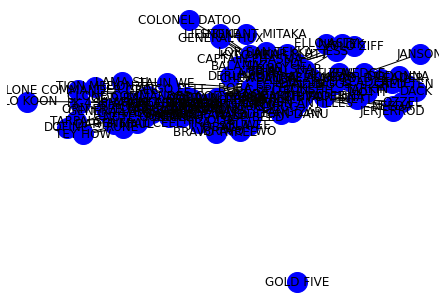

In [37]:
options = {
    'node_color': 'blue',
    'node_size': 400,
    'width': 1,
    'with_labels': True
}

nx.draw(G, **options)


## Handle Outliers

In [48]:
#Graph is not connected, list the "sparse list"
sparse_nodes = []
for each in list(nx.connected_components(G)):
    if len(each) < 10:
        print(each)
        sparse_nodes.append(each)

{'GOLD FIVE'}


Observation: Gold Five has no interactions and on the grounds of interactions is probably the least important to the plot

### Remove sparse nodes and edges

In [49]:
#to figure out the diameter, first remove the sparse nodes and edges
import copy
for each in sparse_nodes:
    for node in each:
        G.remove_node(node)

#### Calculate diameter without sparse nodes

In [50]:
nx.diameter(G)

6

## Top 10 Page Rank

In [51]:
page_ranks = nx.pagerank(G)
sorted(page_ranks.items(),key=lambda x : x[1], reverse = True)[:10]

[('ANAKIN', 0.04077521988021611),
 ('OBI-WAN', 0.037404108064095595),
 ('C-3PO', 0.033967299797439086),
 ('PADME', 0.03216498871205313),
 ('LUKE', 0.028580260473549328),
 ('HAN', 0.025579977938123163),
 ('QUI-GON', 0.025522143343111064),
 ('LEIA', 0.02499796794976556),
 ('JAR JAR', 0.02389322803331475),
 ('EMPEROR', 0.022366513281039457)]

Obseration: As the top rank, Anakin is probably one of the most important characters